Top 5 Demanded Products:
           Total Forecasted Demand
Ice Cream              2686.060663
Paneer                 2680.186868
Ghee                   2607.893217
Curd                   2409.337857
Lassi                  2255.352798

Sales Channel with Highest Demand:
Sales Channel
Retail       374807
Wholesale    369171
Online       329033
Name: Quantity Sold (liters/kg), dtype: int64

Top 5 Products making high  Revenue:
Product Name
Curd      6743880.73
Butter    6276041.59
Lassi     6130168.70
Milk      6021395.90
Paneer    5962594.91
Name: Approx. Total Revenue(INR), dtype: float64

Top 5 Customer Locations by Demand:
Customer Location
Delhi            118604
Chandigarh       114773
Bihar             77544
Uttar Pradesh     68399
Telangana         67750
Name: Quantity Sold (liters/kg), dtype: int64


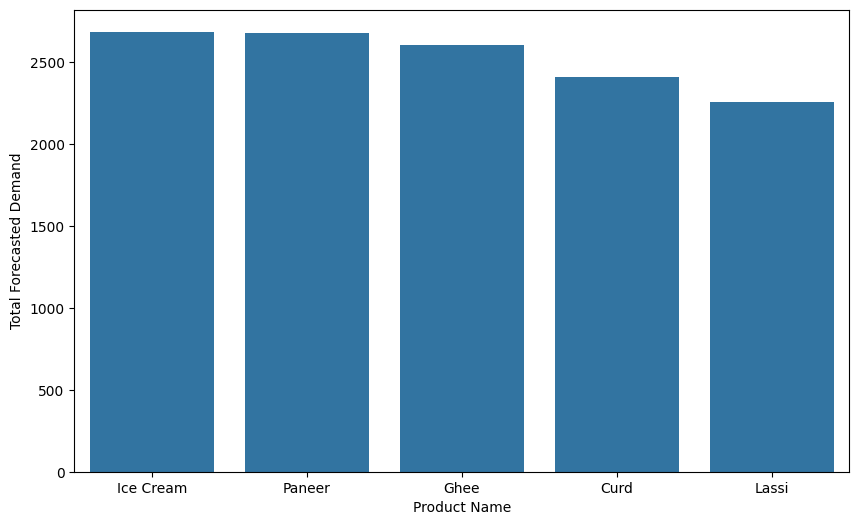

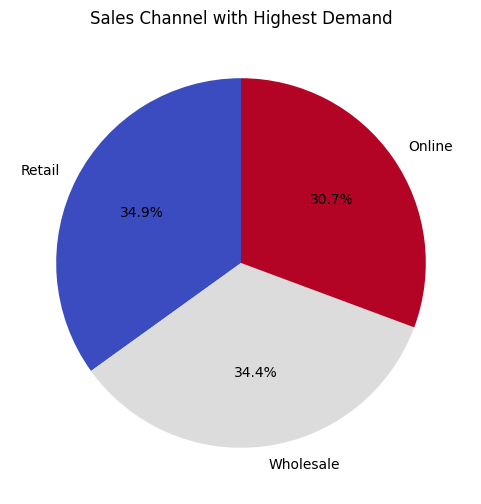

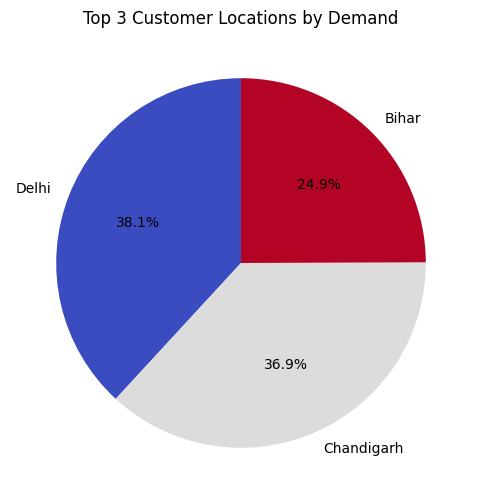

Text(0, 0.5, '')

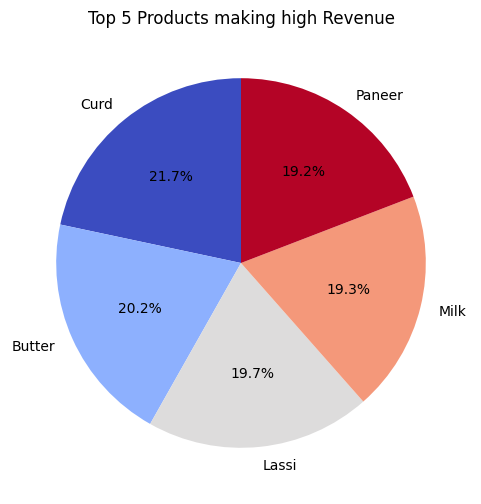

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from statsmodels.tsa.arima.model import ARIMA
import seaborn as sns

df = pd.read_csv("dairy_dataset.csv")

df['Date'] = pd.to_datetime(df['Date'])
df['Expiration Date'] = pd.to_datetime(df['Expiration Date'])
df['Production Date'] = pd.to_datetime(df['Production Date'])
df_sales = df.groupby(['Date', 'Product Name'])['Quantity Sold (liters/kg)'].sum().unstack()

results = {}
forecast_days = 7

for product in df_sales.columns:
    try:
        product_series = df_sales[product].dropna()
        if product_series.empty:
            continue

        model = ARIMA(product_series, order=(5, 1, 0))
        model_fit = model.fit()
        forecast = model_fit.forecast(steps=forecast_days)
        results[product] = np.sum(forecast)
    except:
        continue

df_forecast = pd.DataFrame.from_dict(results, orient='index', columns=['Total Forecasted Demand'])
df_forecast = df_forecast.sort_values(by='Total Forecasted Demand', ascending=False)

df_merged = df.merge(df_forecast, left_on='Product Name', right_index=True, how='inner')

sales_channel_demand = df_merged.groupby('Sales Channel')['Quantity Sold (liters/kg)'].sum().sort_values(ascending=False)
revenue_demand = df_merged.groupby('Product Name')['Approx. Total Revenue(INR)'].sum().sort_values(ascending=False)

customer_location_demand = df_merged.groupby('Customer Location')['Quantity Sold (liters/kg)'].sum().sort_values(ascending=False)

if not df_forecast.empty:
    print("Top 5 Demanded Products:")
    print(df_forecast.head())
    print("\nSales Channel with Highest Demand:")
    print(sales_channel_demand.head())
    print("\nTop 5 Products making high  Revenue:")
    print(revenue_demand.head())
    print("\nTop 5 Customer Locations by Demand:")
    print(customer_location_demand.head())
else:
    print("No sufficient data!.")


# visualizing -
top_products = df_forecast[['Total Forecasted Demand']].head(5)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.index, y='Total Forecasted Demand', data=top_products)
plt.xlabel('Product Name')
plt.ylabel('Total Forecasted Demand')

plt.figure(figsize=(6,6))
sales_channel_demand.head(3).plot(kind='pie', autopct='%1.1f%%', cmap='coolwarm', startangle=90)
plt.title('Sales Channel with Highest Demand')
plt.ylabel('')
plt.show()

top_locations = customer_location_demand.head(3)
plt.figure(figsize=(6,6))
top_locations.plot(kind='pie', autopct='%1.1f%%', cmap='coolwarm', startangle=90)
plt.title('Top 3 Customer Locations by Demand')
plt.ylabel('')
plt.show()

revenue_graph = revenue_demand.head(5)
plt.figure(figsize=(6,6))
revenue_graph.plot(kind='pie', autopct='%1.1f%%', cmap='coolwarm', startangle=90)
plt.title('Top 5 Products making high Revenue')
plt.ylabel('')

In [3]:
pip install pmdarima


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 42.9 MB/s eta 0:00:00
